In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweet_list = pd.read_csv('./train.csv', dtype={'keyword':'str'})
tweet_list.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [3]:
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
tweet_list.keyword.fillna('', inplace=True)
tweet_list.location.fillna('', inplace=True)
tweet_list.text.fillna('', inplace=True)
tweet_list.tail()

,id,keyword,location,text,target
7608,10869,,,Two giant cranes holding a bridge collapse int...,1
7609,10870,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,,,Police investigating after an e-bike collided ...,1
7612,10873,,,The Latest: More Homes Razed by Northern Calif...,1


In [5]:
size_and_target = pd.DataFrame(columns=['text_size', 'target'])
size_and_target['text_size'] = tweet_list['text'].apply(lambda x: len(x))
size_and_target['target'] = tweet_list['target']
group = size_and_target.groupby(['text_size', 'target'])
group_counts = group.size().reset_index(name='counts')
group_counts.head(10)

,text_size,target,counts
0,7,0,3
1,8,0,4
2,9,0,2
3,10,0,2
4,11,0,4
5,12,0,4
6,13,0,3
7,14,0,4
8,14,1,1
9,15,0,3


In [6]:
group_counts = group.size().unstack().reset_index('text_size')
group_counts[0].fillna(0, inplace=True)
group_counts[1].fillna(0, inplace=True)
group_counts.head(10)

target,text_size,0,1
0,7,3.00,0.00
1,8,4.00,0.00
2,9,2.00,0.00
3,10,2.00,0.00
4,11,4.00,0.00
5,12,4.00,0.00
6,13,3.00,0.00
7,14,4.00,1.00
8,15,3.00,0.00
9,16,5.00,0.00


In [7]:
group_counts.describe(include='all')

target,text_size,0,1
count,153.00,153.00,153.00
mean,83.06,28.38,21.38
std,44.41,21.80,29.08
min,7.00,0.00,0.00
25%,45.00,15.00,4.00
50%,83.00,28.00,15.00
75%,121.00,35.00,31.00
max,163.00,127.00,264.00


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text yticklabel objects>)

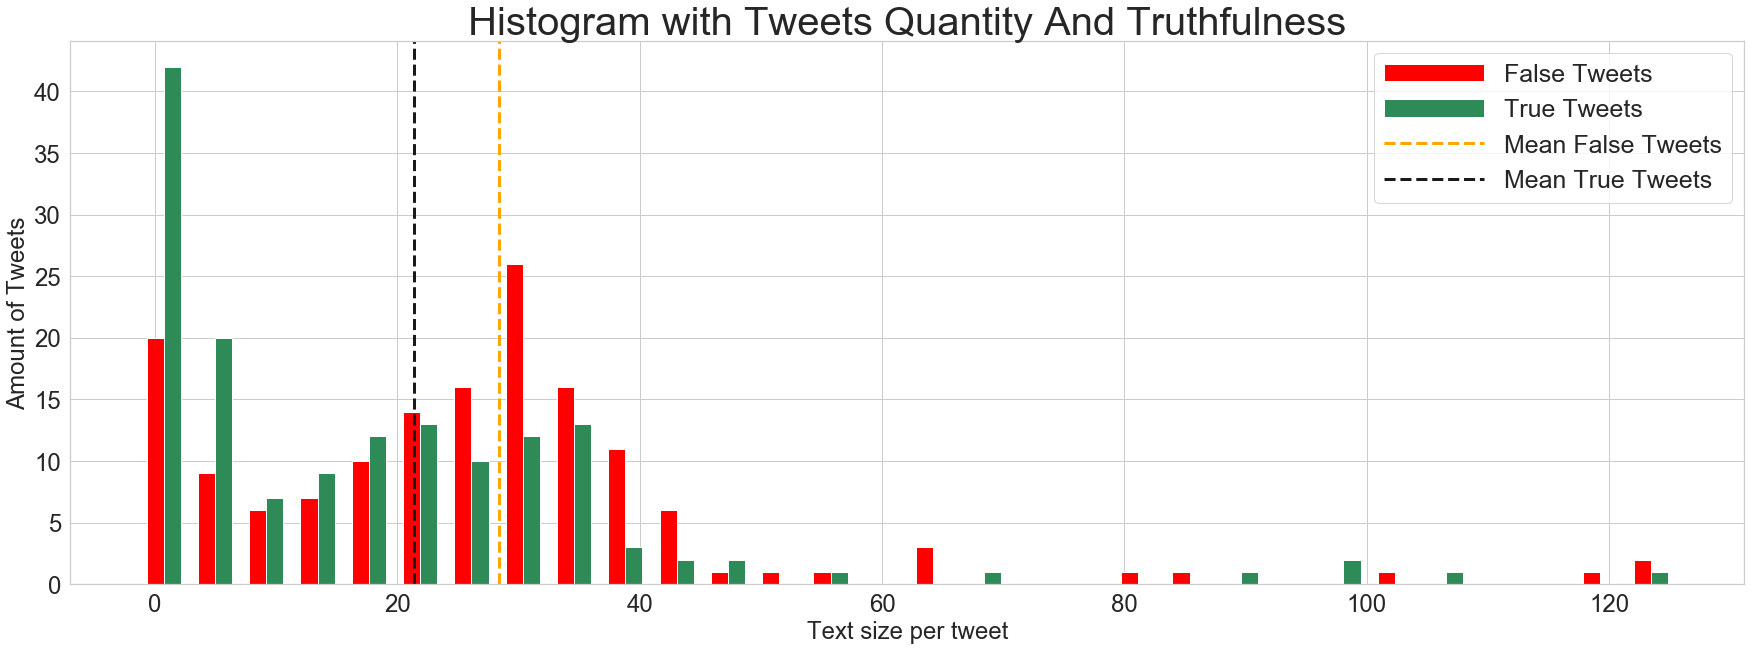

In [10]:
fig, ax = plt.subplots()
params = {'figure.figsize': [30, 10],'legend.fontsize': 25, 'legend.handlelength': 4}

a_heights, a_bins = np.histogram(group_counts[0], bins=30)
b_heights, b_bins = np.histogram(group_counts[1], bins=a_bins)

false_mean = plt.axvline(group_counts[0].mean(), color='orange', linestyle='dashed', linewidth=3)
true_mean = plt.axvline(group_counts[1].mean(), color='k', linestyle='dashed', linewidth=3)

width = (a_bins[1] - a_bins[0])/3

false_tweets = ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
true_tweets = ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')


plt.title("Histogram with Tweets Quantity And Truthfulness", fontsize=40)
plt.ylabel('Amount of Tweets', fontsize=24)
plt.xlabel('Text size per tweet', fontsize=24)
plt.legend([false_tweets, true_tweets, false_mean, true_mean], ['False Tweets', 'True Tweets', 'Mean False Tweets', 'Mean True Tweets'])
plt.rcParams.update(params)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Conclusión

Se puede observar un marcado mayor nivel de veracidad cuando los tweets tiene un texto con una cantidad de caracteres menores a 10.
A partir de de los 30 caracteres se observa una marcada predominancia de tweets falsos.
Esa misma relación se puede observar con las medias de ambas series.

Se puede entender la relación de comunicar rápidamente el evento con la relación de caracteres.
Asumiendo que importa más la velocidad del aviso del evento, entonces podemos imaginar que la descripcion detallada puede generar confusión o replicar la información que obtuvo de fuentes secundarias erróneas.
Por lo tanto, una conclusión rápida entre relación de magnitudes de textos y su veracidad es que al aumentar el grado de desarrollo de la idea expresada en el tweet se debe asumir que existe una alta probabilidad de que la información sea incorrecta.